In [5]:
import mpld3
import matplotlib.pyplot as plt
%matplotlib inline
mpld3.enable_notebook()

In order to create Butterworth filter coefficients, we need to find the complex poles of the transfer function and multiply complex conjugates, then take the bilinear transform to get Z-domain polynomial.

[This page]:https://ccrma.stanford.edu/~jos/fp/Butterworth_Lowpass_Poles_Zeros.html is a good reference to Butterworth filter transfer function.

The poles of a $N^{th}$-order Butterworth filter lie at $e^{j\theta_k}$ for $\theta_k \triangleq \frac{(2k+1)\pi}{2N}$ for $k = 0, ..., N - 1$.

In [6]:
import numpy
from numpy import asarray, zeros, ones, pi, arange, exp, real, imag

In [13]:
N = 10  # filter order
k = arange(N)  # index
theta = pi / 2 + (2 * k + 1) * pi / (2 * N)  # pole angles
pole = exp(-1j * theta)  # complex poles

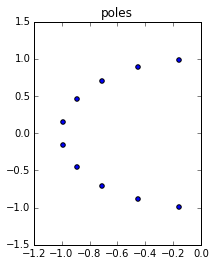

In [21]:
fig = plt.figure(figsize=(3, 4))
ax = fig.add_subplot(111)
ax.scatter(real(pole), imag(pole))
plt.title('poles')
plt.show()

The transfer function looks like:

$$
H(s) = \frac{1}{(s - p_1)(s - p_2)...(s - p_N)}
$$

We can take the bilinear transform by substituting $s = c\frac{z - 1}{z + 1}$ to get:

$$
H(z) = 
$$

A general filter of order $N$ has poles at $p_1, ..., p_N$ and zeros at $q_1, ..., q_N$. The transfer function is

$$
H(s) = \frac{(s - q_1)...(s - q_N)}{(s - p_1)...(s - p_N)}
$$

A common way to map this analog-domain transfer function to the digital domain is to take the bilinear transform:

$$
s = c \frac{z - 1}{z + 1}
$$

Note, this conformal mapping takes $\infty \to -1$, $0 \to 1$, and the left-half s-plane to the inside of the unit circle.

$$
H(z) = \frac{(z - 1 - \frac{q_1}{c} (z + 1))...(z - 1 - \frac{q_N}{c} (z + 1))}{(z - 1 - \frac{p_1}{c} (z + 1))...(z - 1 - \frac{p_N}{c} (z + 1))}
$$